In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Set parameters
matplotlib.rcParams['figure.figsize'] = [8., 5.]
sns.set_style('darkgrid')

# Import and suppress warnings
#import warnings
#warnings.filterwarnings('ignore')

# Data exploration

## Load and describe dataset

In [2]:
attrition = pd.read_csv('../input/WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [4]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# Looking for NaN
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

Let's manually exclude some features which are definitely not relevant, and will confuse our models. Suspicious features are EmployeeCount, EmployeeNumber, StandardHours.

In [6]:
print("EmployeeCount values: %s" % (attrition.EmployeeCount.unique()))
print("EmployeeNumber unique count: %d Total rows: %d" % (attrition.EmployeeNumber.unique().size, attrition.shape[0]))
print("EmployeeCount values: %s" % (attrition.StandardHours.unique()))

EmployeeCount values: [1]
EmployeeNumber unique count: 1470 Total rows: 1470
EmployeeCount values: [80]


So it appears that we can drop all this stuff from dataset, since 2 items are just constants, probably used for feature extraction during dataset formation, and one is just unique employee number, which will confuse models, especially after using oversampling techniques.

In [7]:
attrition.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)

## Correlation of Features

Now let's find out if there are many correlated factors by printing correlation heatmap.

In [8]:
# Encode attrition target atttibute as numeric so it participates in correlation matrix
target_map = {'Yes':1, 'No':0}
attrition["Attrition"] = attrition["Attrition"].apply(lambda x: target_map[x])

In [9]:
attrition._get_numeric_data().head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


Another thing we should be aware of is that there are numerical fields which are actually categorical:

Education:
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction:
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement:
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction:
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating:
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction:
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance:
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

This representation is weak monotonic mapping from real metrics to integers, so let it be. Probably it would be better to change it to one-hot encoding, for methods other than decision trees to work better.

In [10]:
# creating a list of only numerical values
numerical_data = attrition._get_numeric_data()
layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
)
fig = go.Figure(data=[
    go.Heatmap(
        z=numerical_data.astype(np.float64).corr().values, # Generating the Pearson correlation
        x=numerical_data.columns.values,
        y=numerical_data.columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0
        
    )
], layout=layout)
py.iplot(fig, filename='labelled-heatmap')

### Takeaway from the correlation plot

From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. So there is no point of using PCA at this moment.
Regarding Attrition feature, we can see that generally it is not much correlated with other features, however the features which produce maximum absolute correlation with Attrition are:
- Age
- JobInvolvement
- JobLevel
- MonthlyIncome
- StockOptionLevel
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsWithCurrentManager

JobLevel and MonthlyIncome are highly correlated between each other, same with (YearsAtCompany, YearsInCurrentRole, YearsWithCurrentManager), so basically they can be reduced into one geature per set.

## Pairplot Visualisations

Now let's plot some pairwise dependencies.

/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



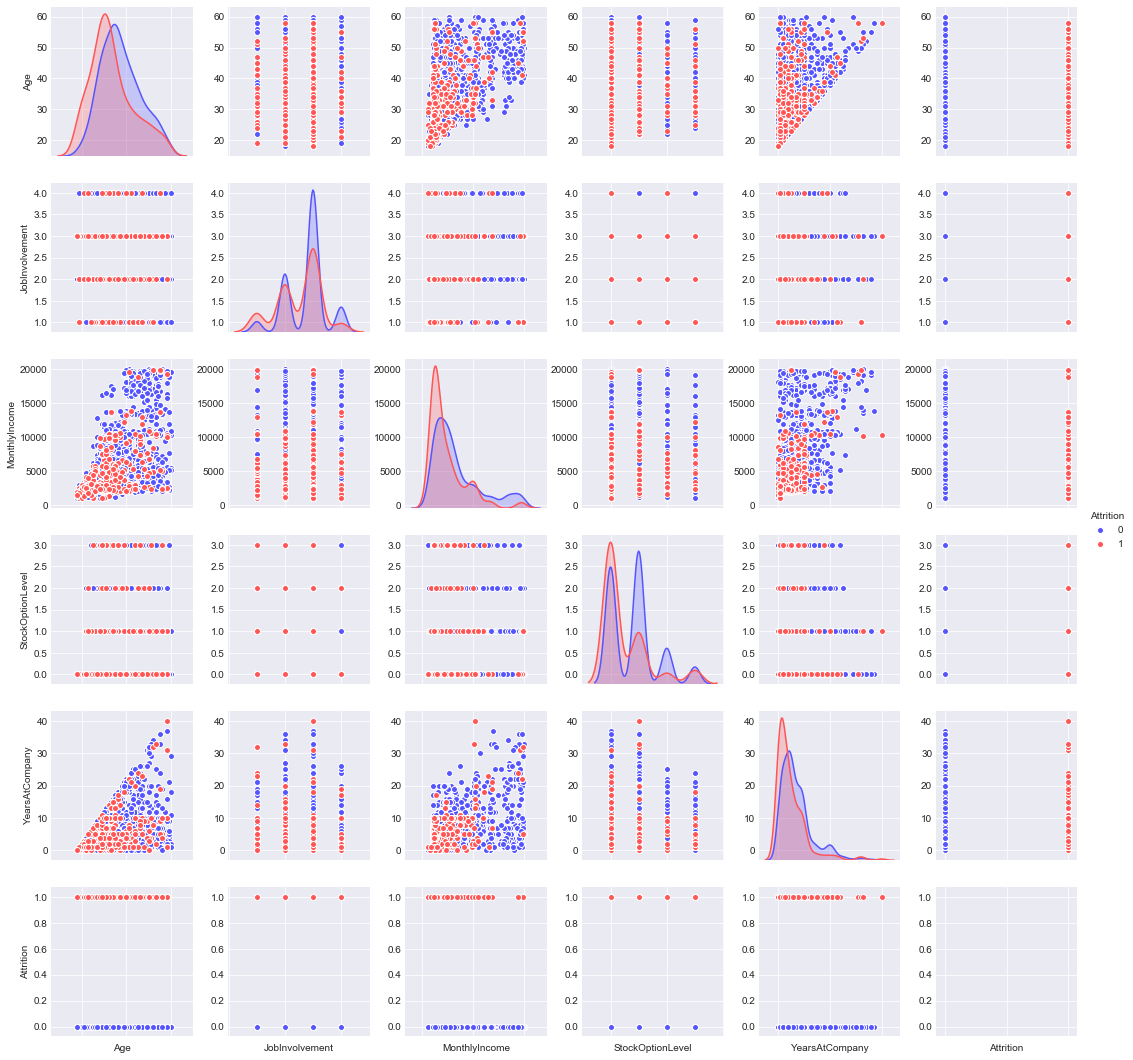

In [11]:
# Refining our list of numerical variables
numerical = [u'Age', u'JobInvolvement',  u'MonthlyIncome',
       u'StockOptionLevel', u'YearsAtCompany', u'Attrition']

g = sns.pairplot(attrition[numerical], hue='Attrition', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

Interesting fact we can see from this plot is that most part of exhausted workers worked for no longer than 10 years, and mostly their monthly income is not higher than 11000$.

# Feature Engineering & Categorical Encoding

Having carried out a brief exploration into the dataset, let us now proceed onto the task of Feature engineering and numerically encoding the categorical values in our dataset.


To start off, we shall perform one-hot encoding of categorical items using get_dummies method.

In [12]:
categorical = []
for col, value in attrition.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
print(categorical)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [13]:
data = pd.get_dummies(attrition,columns=categorical,drop_first=True)
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


One thing left to go is to split dataset into input features and target variable.

In [14]:
data_input = data.drop(['Attrition'], axis=1)
data_target = data['Attrition']

Let's check the target value distribution within given dataset:

In [15]:
py.iplot([go.Bar(
            x=data["Attrition"].value_counts().index.values,
            y= data["Attrition"].value_counts().values
    )], filename='basic-bar')

Therefore we have to keep in mind that there is quite a big imbalance in our target variable. Many statistical techniques have been put forth to treat imbalances in data (oversampling or undersampling). In this notebook, I will use an oversampling technique known as SMOTE to treat this imbalance.

Let's take a look at our correlation plot again, after introducing dummy one-hot encoding.

In [16]:
# creating a list of only numerical values
numerical_data = data._get_numeric_data()
layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
)

fig = go.Figure(data=[
    go.Heatmap(
        z=numerical_data.astype(np.float64).corr().values, # Generating the Pearson correlation
        x=numerical_data.columns.values,
        y=numerical_data.columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0
        
    )
], layout=layout)
py.iplot(fig, filename='labelled-heatmap')

It appears that there are several correlated pairs, which can be reduced by using PCA or other reduction algorithm.

# Implementing Models

In this part we will try to find models which descibe the dataset. 

The problem with attritive workers' detection is that errors of both types lead to loss. If we predict that the staff member experiences attrition, but he/she is really not attritive, then after sending the staff member on a vacation or even firing we lose potentially efficient workforce. If we predict that staff member is not attritive whilest he/she is, then we will not receive full potential impact from this worker.

So we are going to trade off both precision and recall metrics.

## Sampling from dataset

In [17]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_test = train_test_split(data_input, data_target, train_size= 0.7,random_state=0)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



Since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.

In [18]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(train,target_train)

Another way to bear imbalance is to make dummy random oversampling from minor class.

In [19]:
from sklearn.utils import resample
count_no = (target_train == 0).sum()
resample_train, resample_target = resample(train[target_train == 1],
                                           target_train[target_train == 1], n_samples=count_no)
resample_train = pd.concat((train[target_train == 0], resample_train))
resample_target = pd.concat((target_train[target_train == 0], resample_target))

We will fix the random seed for further models.

In [20]:
seed = 42

Now let's create some wrappers around GridSearchCV and our datasets to find correct hyperparameters using CV folding.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer, roc_curve, auc

def __hyperopt_helper(classifier, X, y, params, cv):
    grid = GridSearchCV(classifier, params, cv=cv, scoring=make_scorer(f1_score, pos_label=1))
    grid.fit(X, y)
    print(grid.best_params_)
    return grid

def smote_hyperopt(classifier, params, cv=5):
    return __hyperopt_helper(classifier, smote_train, smote_target, params, cv)

def resample_hyperopt(classifier, params, cv=5):
    return __hyperopt_helper(classifier, resample_train, resample_target, params, cv)

And some utility for test set validation.

In [22]:
def test_validation(cls):
    prediction = cls.predict(test)
    print("Accuracy: %f\n" % (accuracy_score(target_test, prediction)))
    print(classification_report(target_test, prediction))
    if hasattr(cls, 'predict_proba'):
        fpr, tpr, tsh = roc_curve(target_test, cls.predict_proba(test)[:, 1], pos_label=1)
        fig, ax = plt.subplots(figsize=(5,5))
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.plot(fpr, tpr, label='ROC')
        ax.plot([0,1],[0,1], 'r--', label='luck')
        ax.legend(loc='lower right')
        print("AUC-ROC: %f" %(auc(fpr, tpr)))
    return prediction

def plot_all_rocs(**cls):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot([0,1],[0,1], 'r--', label='luck')
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    for cls_name, cls in cls.items():
        if hasattr(cls, 'predict_proba'):
            fpr, tpr, tsh = roc_curve(target_test, cls.predict_proba(test)[:, 1], pos_label=1)
            ax.plot(fpr, tpr, label='$ROC_{%s}$' % (cls_name))
    ax.legend(loc='lower right', fontsize=14)

## 1. Ensemble models

Let's provide an utility to print out most important features for the classifier.

In [23]:
# use plotly to build diagram with cool hover
def plot_importances(name, cls):
    if hasattr(cls, 'feature_importances_'):
        layout= go.Layout(autosize= True,
                          title= '%s Model Feature Importance' % (name),
                          hovermode= 'closest',
                          xaxis= dict(ticklen=5, showgrid=False, zeroline=False, showline=False),
                          yaxis=dict(title='Feature Importance', showgrid=False, zeroline=False,
                                     ticklen=5, gridwidth=2),
                          showlegend= False)
        fig = go.Figure(data=[go.Scatter(y = cls.feature_importances_,
                                         x = data_input.columns.values,
                                         mode='markers',
                                         marker=dict(sizemode='diameter', sizeref=1,size=13,
                                                     color=cls.feature_importances_,
                                                     colorscale='Portland',showscale=True),
                                         text = data_input.columns.values)], layout=layout)
        py.iplot(fig,filename='scatter')

### Random Forest

In [24]:
# rf_base = RandomForestClassifier(n_jobs=-1, min_samples_split=50)
# rf_param_grid = {
#     'n_estimators' : [500, 600, 700, 800, 900, 1000],
#     'max_depth' : [5, 7, 9, 11],
#     'min_samples_leaf' : [5, 10],
# }
# rf_grid_smote = smote_hyperopt(rf_base,rf_param_grid)
# rf_grid_resamp = resample_hyperopt(rf_base,rf_param_grid)

In [25]:
rf = RandomForestClassifier(
    n_jobs=-1,
    n_estimators=1000,
    warm_start=True,
    max_depth=7,
    min_samples_split=50,
    min_samples_leaf=5,
    random_state=seed,
    verbose=0)
rf.fit(smote_train, smote_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=True)

Accuracy: 0.886621

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       371
          1       0.78      0.40      0.53        70

avg / total       0.88      0.89      0.87       441

AUC-ROC: 0.803658


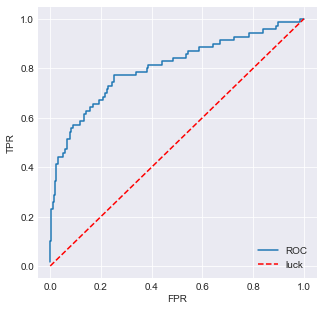

In [26]:
rf_predictions = test_validation(rf)

#### Decision Tree instance
Let's print possible tree from trained forest.

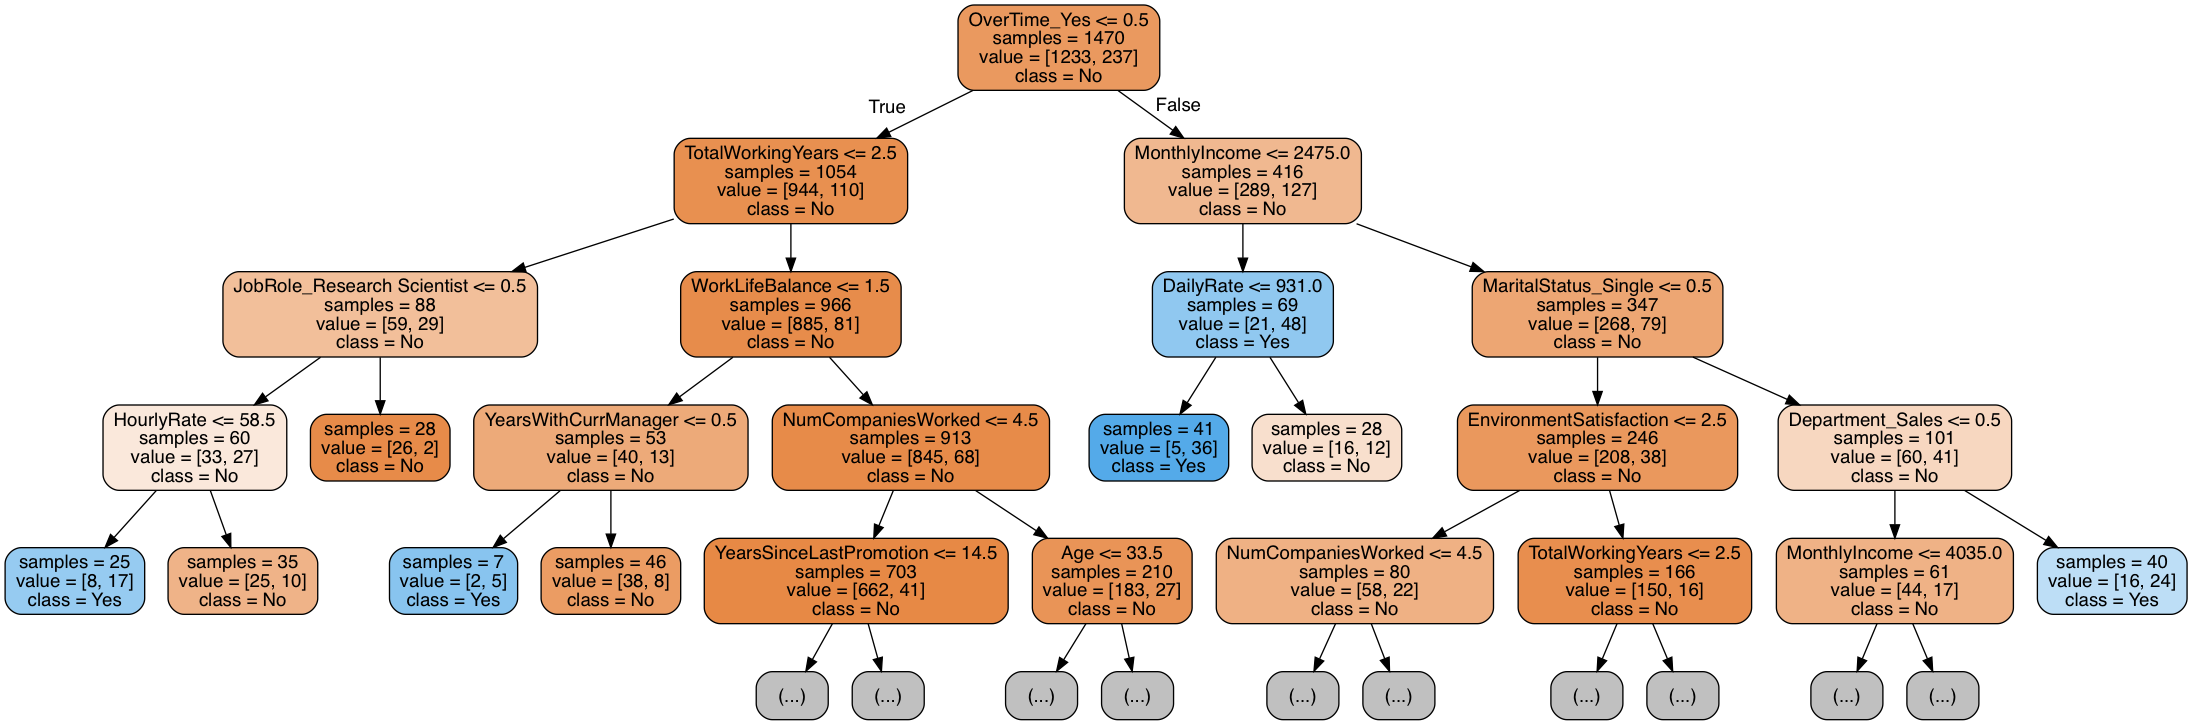

In [27]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call

# train dummy tree with given parameters
decision_tree = tree.DecisionTreeClassifier(
    max_depth=7,
    min_samples_split=50,
    min_samples_leaf=5,
    random_state=seed)
decision_tree.fit(data_input, data_target)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = data_input.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
check_call(['dot','-Tpng','tree1.dot','-o','sample-out.png'])

# Show tree diagram
PImage("sample-out.png")

#### Feature Ranking via the Random Forest Model

Now let's print out the most important features in the trained Random Forest model.

In [28]:
plot_importances('Random Forest', rf)

It seems that most important features for Random Forest Model are OverTime and MaritalStatus and StockOptionLevel, which seems quite reasonable.

### Gradient Boosted Classifier

In [29]:
# gb_base = GradientBoostingClassifier(
#     max_features=0.5,
#     max_depth=11,
#     learning_rate=0.6,
#     random_state=seed)
# gb_param_grid = {
#     'n_estimators' : [100, 300, 500, 700, 900],
#     'subsample' : np.arange(0.1, 1, 0.1),
# }
# gb_grid_smote = smote_hyperopt(gb_base,gb_param_grid)
# gb_grid_resamp = resample_hyperopt(gb_base,gb_param_grid)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.6,
    max_depth=11,
    min_samples_leaf=10,
    subsample=0.6,
    random_state=seed,
    verbose=0)
gb.fit(smote_train, smote_target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.6, loss='deviance', max_depth=11,
              max_features=0.5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=0.6, verbose=0,
              warm_start=False)

Accuracy: 0.882086

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       371
          1       0.72      0.41      0.53        70

avg / total       0.87      0.88      0.87       441

AUC-ROC: 0.805583


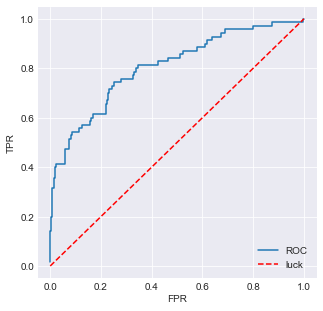

In [31]:
gb_predictions = test_validation(gb)

#### Feature Ranking via the Gradient Boosting Model

In [32]:
plot_importances('Gradient Boosting', gb)

### AdaBoost using exponential loss

In [33]:
adb = GradientBoostingClassifier(
    loss='exponential',
    n_estimators=100,
    max_features=0.6,
    learning_rate=0.2,
    max_depth=11,
    min_samples_leaf=20,
    subsample=0.6,
    random_state=seed,
    verbose=0)
adb.fit(smote_train, smote_target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='exponential', max_depth=11,
              max_features=0.6, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=0.6, verbose=0,
              warm_start=False)

Accuracy: 0.875283

             precision    recall  f1-score   support

          0       0.89      0.98      0.93       371
          1       0.74      0.33      0.46        70

avg / total       0.86      0.88      0.85       441

AUC-ROC: 0.801232


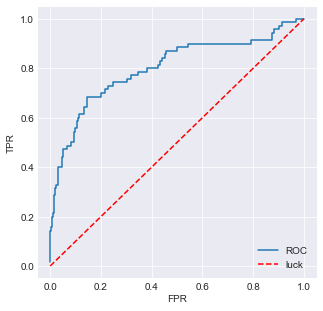

In [34]:
adb_predictions = test_validation(adb)

#### Feature Ranking via the Exponential Gradient Boosting Model

In [35]:
plot_importances('Exponential Gradient Boosting', adb)

### AdaBoost with decision trunks

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=seed)
adt.fit(smote_train, smote_target)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42)

Accuracy: 0.873016

             precision    recall  f1-score   support

          0       0.92      0.94      0.93       371
          1       0.61      0.54      0.58        70

avg / total       0.87      0.87      0.87       441

AUC-ROC: 0.806161


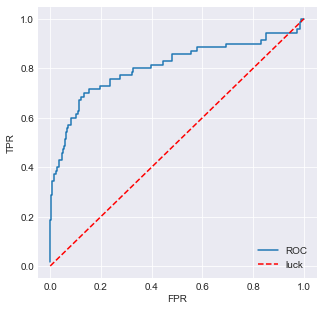

In [37]:
adt_predictions = test_validation(adt)

So this classifier reaches recall metric current record, hovewer its precision is quite low. F1 is also the best of all for now.

In [38]:
plot_importances('AdaBoost + Trunks', adt)

### Voting classifier

Let's make a uniform aggregation of all the previous classifiers.

In [39]:
from sklearn.ensemble import VotingClassifier
vot = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('adt', adt)],
                       voting='soft',
                       n_jobs=-1)
vot.fit(smote_train, smote_target)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=50,
            min_weig...None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

Accuracy: 0.886621

             precision    recall  f1-score   support

          0       0.89      0.98      0.94       371
          1       0.79      0.39      0.52        70

avg / total       0.88      0.89      0.87       441

AUC-ROC: 0.815787


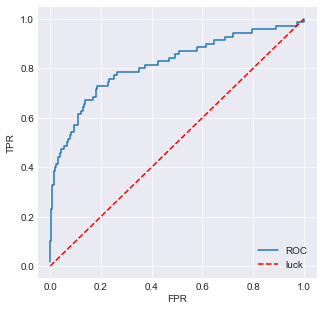

In [40]:
vot_predictions = test_validation(vot)

We've got highest precision yet, but lower recall than all of the models inside this voting classifier.

## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
pp_knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=50,weights='distance', p=1))
])
pp_knn.fit(smote_train, smote_target)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=1,
           weights='distance'))])

Accuracy: 0.848073

             precision    recall  f1-score   support

          0       0.92      0.90      0.91       371
          1       0.52      0.56      0.54        70

avg / total       0.85      0.85      0.85       441

AUC-ROC: 0.793300


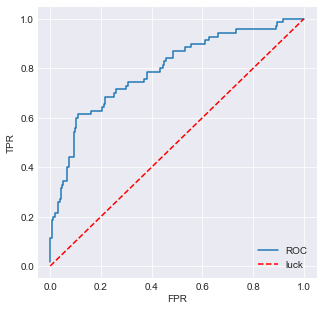

In [42]:
knn_predictions = test_validation(pp_knn)

## SVM

### Gausian SVC

In [43]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
pp_svc_g = Pipeline([
    ('scale', StandardScaler()),
    ('svm', SVC(C=0.5,kernel='rbf',probability=True, random_state=seed))
])
pp_svc_g.fit(resample_train, resample_target)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

Accuracy: 0.861678

             precision    recall  f1-score   support

          0       0.93      0.90      0.92       371
          1       0.55      0.66      0.60        70

avg / total       0.87      0.86      0.87       441

AUC-ROC: 0.826377


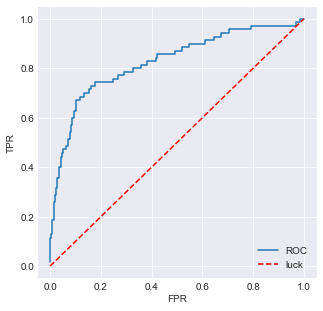

In [44]:
svc_g_predictions = test_validation(pp_svc_g)

### Linear SVC

In [45]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
pp_svc_l = Pipeline([
    ('scale', StandardScaler()),
    ('svm', SVC(C=0.5,kernel='linear',probability=True, random_state=seed))
])
pp_svc_l.fit(resample_train, resample_target)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))])

Accuracy: 0.750567

             precision    recall  f1-score   support

          0       0.95      0.74      0.83       371
          1       0.37      0.79      0.50        70

avg / total       0.86      0.75      0.78       441

AUC-ROC: 0.844917


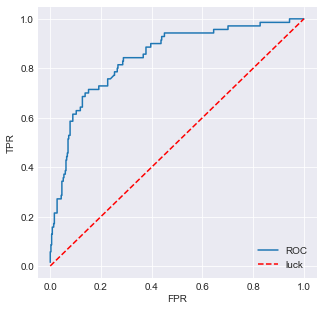

In [46]:
svc_l_predictions = test_validation(pp_svc_l)

### Voting Classifier with SVM

In [47]:
from sklearn.ensemble import VotingClassifier
vot_svc = VotingClassifier(estimators=[('svc_l', pp_svc_g), ('svc_g', pp_svc_l)],
                       voting='soft',
                       n_jobs=-1)
vot_svc.fit(resample_train, resample_target)

VotingClassifier(estimators=[('svc_l', Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random...,
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))]))],
         flatten_transform=None, n_jobs=-1, voting='soft', weights=None)

Accuracy: 0.850340

             precision    recall  f1-score   support

          0       0.94      0.88      0.91       371
          1       0.52      0.70      0.60        70

avg / total       0.87      0.85      0.86       441

AUC-ROC: 0.851213


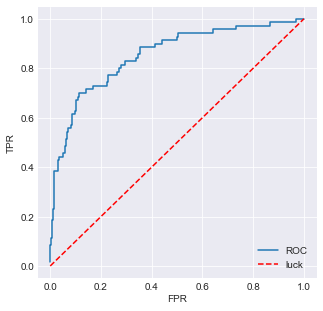

In [48]:
vot_svc_predictions = test_validation(vot_svc)

# Risk probability and risk value calculation

Let's calculate risk probability as model probability of being attritive.

$$ 
p_i = \mathbb{P}_{model}\{\text{i-th worker is attritive}\} 
$$

Attritive worker lacks of motivation and initiative. And sometimes such workers behave strangely. Even though we have performance rating, it is not correct to judge person's impact based on this metric. Worker can do a lot of work, but do not progress, while progress is very important factor in such innovative companies as IBM. Besides, in our dataset we have only "Excellent" and "Outstanding" marks for performance rating, so it does not seem reliable.

Now I will introduce some definitions and assumptions.

***Impact*** is the amount of benefit from worker measured by monthly rate. I will assume that HR specialists' work is "Outstanding" and they determine impact perfectly. Another assumption regarding impact would be that it reduces by $\alpha = 0.5$ fraction in case of attrition.

$$ I_i = MR_i \cdot (1 - A_i \alpha) \text{, where } A_i \text{ - indicator that i-th worker is attritive (random variable)}$$

***Impact loss*** is defined simply as monthly rate subtracted by real impact.

$$ IL_i = MR_i - MR_i \cdot (1 - A_i \alpha) = MR_i \cdot A_i \alpha $$

At this point we already can define risk value as expectation of $IL_i$. But you might wonder how we can use these numbers. 

Let's assume that we have recreation program, i.e. if we find out that person could be attritive, we can offer a one-month paid vacation with the paid psychologist course. Given course program success probability $q$ we can decide whether it is profitable in terms of impact to offer such a program.

We have 2 possible outcomes:
- do not offer program, in this case in the following $N$ months we have an impact loss of $(N+1) \cdot IL_i$
- offer recreation program, in this case in the following $N$ months we have an impact loss of $MR_i + PS + \nu_i \cdot N \cdot IL_i$, where $PS$ is the price of psychologist course and $\nu_i$ is an indicator for program failure

So we have to compare $(N+1) \cdot IL_i$ and $MR_i + PS + \nu_i \cdot N \cdot IL_i$ on average, and if 
$\Psi_i = \mathbb{E} \left(((N+1) \cdot IL_i) - (MR_i + PS + \nu_i \cdot N \cdot IL_i)\right) > 0$, then we can offer this program.

Let's assume that random variables $\nu_i$ and $A_i$ are independent for the ease of calculation (more complicated models can be built, but they require more research). This will allow to express $\mathbb{E} (\nu_i IL_i)$ as $\mathbb{E} \nu_i \cdot \mathbb{E} IL_i = (1 - q) \cdot p_i \cdot \alpha MR_i$. Then we can calculate

$$ \Psi_i = (N+1) \cdot \mathbb{E} IL_i - (MR_i + PS + N \cdot \mathbb{E} \nu_i \mathbb{E} IL_i) = (N+1) \cdot MR_i p_i \alpha - (MR_i + PS + N \cdot (1-q) \cdot MR_i p_i \alpha) = MR_i ( (1 + Nq) \cdot p_i \alpha - 1) - PS$$

Now we have simplified criterion: if $(1 + Nq) \mathbb{E} IL_i - MR_i - PS > 0$, then we offer the program.

In [49]:
class RiskReporter:
    def __init__(self, classifier, loss_multiplier=0.5):
        self.classifier_ = classifier
        self.alpha = loss_multiplier
        
    @property
    def probs(self):
        if not hasattr(self, '__probs'):
            self.__probs = self.classifier_.predict_proba(data_input)[:,1]
        return self.__probs
    
    @property
    def monthly_risk(self):
        if not hasattr(self, '__monthly_risk'):
            self.__monthly_risk = self.probs * data_input.MonthlyRate.as_matrix() * self.alpha
        return self.__monthly_risk
    
    @property
    def daily_risk(self):
        if not hasattr(self, '__daily_risk'):
            self.__daily_risk = self.probs * data_input.DailyRate.as_matrix() * self.alpha
        return self.__daily_risk
    
    @property
    def hourly_risk(self):
        if not hasattr(self, '__hourly_risk'):
            self.__hourly_risk = self.probs * data_input.HourlyRate.as_matrix() * self.alpha
        return self.__hourly_risk
    
    @property
    def report(self):
        df = pd.DataFrame(data={'MonthlyRisk': self.monthly_risk,
                                'DailyRisk': self.daily_risk,
                                'HourlyRisk':self.hourly_risk})
        desc = df.describe()
        desc.loc['sum'] = df.sum()
        display(desc)
        return df
    
class RecreationReporter(RiskReporter):
    def __init__(self, classifier, loss_multiplier=0.5):
        super().__init__(classifier, loss_multiplier)
    
    def report_with_candidates(self, n_months, add_cost=1000, success_prob=0.9):
        rprt = self.report
        rprt['Candidates'] = (1 + n_months * success_prob) * self.monthly_risk - data_input.MonthlyRate.as_matrix() - add_cost > 0
        return rprt

## Random Forest based report

In [50]:
rf_rr = RecreationReporter(rf)
rf_report = rf_rr.report_with_candidates(3) # 3 months, additional cost = 1000, success probability=0.9
print("There are %d candidates for recreation program" % (rf_report.Candidates.sum()))

,DailyRisk,HourlyRisk,MonthlyRisk
count,1470.000000,1470.000000,1.470000e+03
mean,107.743621,8.990683,1.957471e+03
std,85.389976,5.794061,1.553135e+03
min,6.266372,1.051300,1.044098e+02
25%,47.945452,4.761665,8.552751e+02
50%,83.280346,7.466971,1.545837e+03
75%,140.882818,11.919284,2.624107e+03
max,568.843120,40.266686,1.067285e+04
sum,158383.123006,13216.304503,2.877483e+06


There are 67 candidates for recreation program


## Ensemble Voting based report

In [51]:
vot_rr = RecreationReporter(vot)
vot_report = vot_rr.report_with_candidates(3) # 3 months, additional cost = 1000, success probability=0.9
print("There are %d candidates for recreation program" % (vot_report.Candidates.sum()))

,DailyRisk,HourlyRisk,MonthlyRisk
count,1470.000000,1470.000000,1.470000e+03
mean,117.908651,9.831444,2.168821e+03
std,87.244883,5.991233,1.687272e+03
min,8.492502,2.850600,1.486613e+02
25%,61.395812,5.903256,1.033788e+03
50%,102.127291,8.509407,1.823602e+03
75%,145.668655,11.201409,2.687201e+03
max,549.965156,38.553827,1.040231e+04
sum,173325.716807,14452.222741,3.188167e+06


There are 172 candidates for recreation program


## SVM Voting based report

In [52]:
vot_svc_rr = RecreationReporter(vot_svc)
vot_svc_report = vot_svc_rr.report_with_candidates(3) # 3 months, additional cost = 1000, success probability=0.9
print("There are %d candidates for recreation program" % (vot_svc_report.Candidates.sum()))

,DailyRisk,HourlyRisk,MonthlyRisk
count,1470.000000,1470.000000,1.470000e+03
mean,116.496763,9.808914,2.254082e+03
std,129.176468,9.525864,2.548908e+03
min,0.831713,0.124807,1.379295e+01
25%,27.385686,2.770490,4.548676e+02
50%,68.631313,6.546980,1.252493e+03
75%,157.675848,13.800973,3.066054e+03
max,685.669065,48.597485,1.285851e+04
sum,171250.241526,14419.102964,3.313501e+06


There are 250 candidates for recreation program


# Conclusion

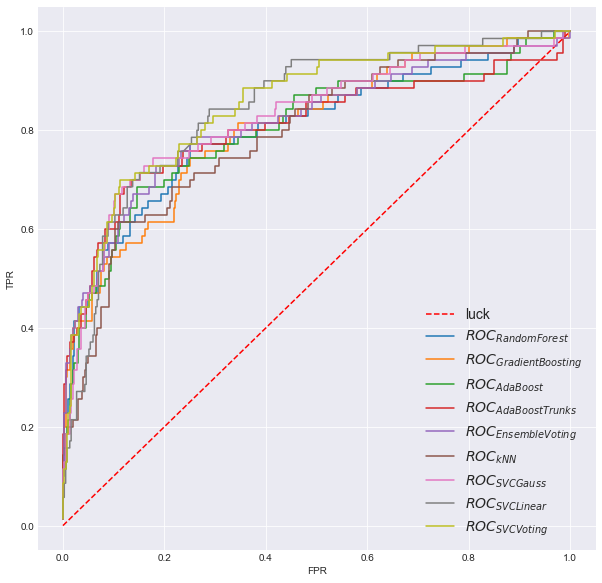

In [53]:
plot_all_rocs(RandomForest=rf,
              GradientBoosting=gb,
              AdaBoost=adb,
              AdaBoostTrunks=adt,
              EnsembleVoting=vot,
              kNN=pp_knn,
              SVCGauss=pp_svc_g,
              SVCLinear=pp_svc_l,
              SVCVoting=vot_svc)

Despite of proper data preprocessing and feature filtering, considered models haven't produced high cross-validation score. Maximum f1 score was reached with SVM classifier, but it was not high enough - 0.6. Probably that is because data is very overlapping, and some classifiers can produce higher precision, but lower recall, and vice versa.

The second part of this notebook shows the risk model based on the dataset. Risk model utilizes probabilities acqiured from classification model, and three risk models were built from Random Forest, Voting Classifier based on ensemble models, and Voting Classifier based on SVM models respectively. The models have shown risk value varying from \$2.8M to \$3.4M, more recalling model producing higher risk value.

The most precise Random Forest model had shown that there are 67 candidates for recreation program, while the most recalling mixing of SVM classifiers produces 249 candidates.